# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Jordan Wheeler
https://github.com/jordanwheeler7/CSIS-44620-wnlp-materials-web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [8]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.5.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpo

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [9]:
# Gather Information from webpage
url = ('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
response = requests.get(url)

# Check if the request was successful

if response.status_code == 200:
    # Gather Information
    text = response.text
    # Parse HTML
    soup = BeautifulSoup(text, "html.parser")
    # Find Article
    article = soup.find("article")

# Dump to .pkl file
    with open('hackaday.pkl', 'wb') as file:
        pickle.dump(str(article), file)
    print("Information gathered and saved to 'hackaday.pkl' successfully.")
else:
        print("Failed to retrieve the webpage. Status code:", response.status_code)

Information gathered and saved to 'hackaday.pkl' successfully.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [12]:
# Read file contents in
with open("hackaday.pkl", "rb") as file:
    article_text = pickle.load(file)

# Parse HTML content
    soup = BeautifulSoup(article_text, "html.parser")
    text = soup.get_text()
    
# Strip blank lines

text_formatted = "\n".join(line for line in text.split("\n") if line.strip())

print(text_formatted)

How Laser Headlights Work
                130 Comments            
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [23]:
# Train spaCy

nlp = spacy.load("en_core_web_sm")

# Gather Article Text

doc = nlp(text_formatted)

# Define Our Function

def frequent_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Common Tokens
common_tokens = [token.text.lower() for token in doc if frequent_tokens(token)]

# Get Count

token_count = Counter(common_tokens)

# Top Tokens

top_tokens = token_count.most_common(5)

# Print Tokens

print('The top 5 tokens followed by their frequncy are:')
for token, count in top_tokens:
    print(f'{token} {count}')

The top 5 tokens followed by their frequncy are:
laser 35
headlights 19
headlight 11
technology 10
led 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [14]:
# Lemmas

lemmas = [token.lemma_.lower() for token in doc if frequent_tokens(token)]
lemma_count = Counter(lemmas)
common_lemmas = lemma_count.most_common(5)

print('The top 5 lemmas followed by their frequncy are:')
for lemma, count in common_lemmas:
    print(f'{lemma} {count}')


The top 5 lemmas followed by their frequncy are:
laser 40
headlight 28
beam 12
technology 10
light 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [15]:
# Function for interesting token : total use ratio

def score_sentence_by_token(sentence, interesting_token):
    total_use_count = len([token for token in sentence])
    interesting_count = len([token.text.lower() for token in sentence if token.text in interesting_token])
    score = interesting_count / total_use_count
    return score

# Test on 1 Sentence
sentences = list(doc.sents)
print(score_sentence_by_token(sentences[0], common_tokens))

0.15789473684210525


In [16]:
# Function for interesting token : total use ratio

def score_sentence_by_lemma(sentence, interesting_lemmas):
    total_use_count = len([word for word in sentence])
    interesting_lemma_count = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    score = interesting_lemma_count / total_use_count
    return score

# Test on 1 Sentence
sentences = list(doc.sents)
print(score_sentence_by_lemma(sentences[0], lemmas))

0.15789473684210525


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

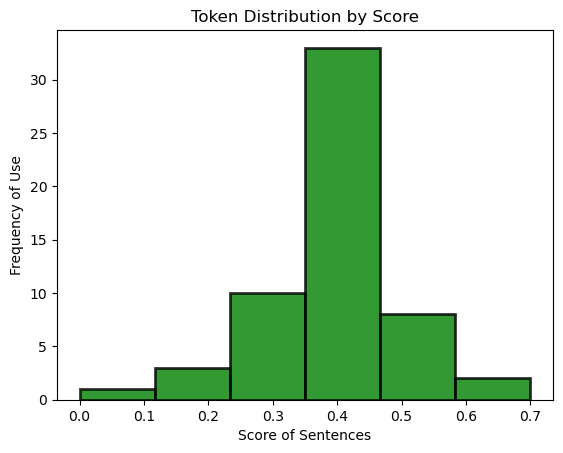

In [17]:
# Scores for Tokens

token_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, common_tokens)
    token_scores.append(score)
    
# Plot Score Distributions

plt.hist(token_scores, bins=6, range=(0,.7), color='green', edgecolor='black', linewidth=2, alpha=.8)
plt.title('Token Distribution by Score')
plt.xlabel('Score of Sentences')
plt.ylabel('Frequency of Use')
plt.show()

# For our Token distribution, we can see from the histogram that our most common tokens lie between .35 and .45.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

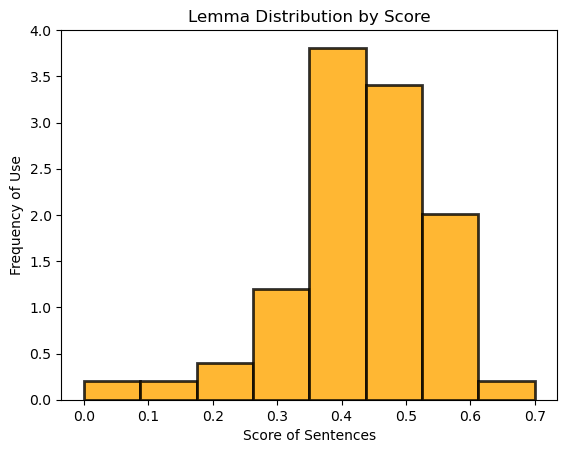

In [18]:
# Scoroes for Lemmas

lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, lemmas)
    lemma_scores.append(score)
    
# Plot Score Distributions

plt.hist(lemma_scores, density=True, bins=8, range=(0,.7), color='orange', edgecolor='black', linewidth=2, alpha=.8)
plt.title('Lemma Distribution by Score')
plt.xlabel('Score of Sentences')
plt.ylabel('Frequency of Use')
plt.show()

# The histogram shows that the most common distribution for our lemmas lie between .35 and .5.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).


In the code cells below, we can see how we would go about getting only nouns and what words would be ommitted. The easiest way to find this answer is to use spaCy's built in parts-of-speech (POS) function. I used information from https://spacy.io/usage/linguistic-features to get the answer. In the first code below we use the return not to ensure that we took advantage of teh POS tagging keeping only those that are in the nouns list. The statement returns true when the following conditions are met: it is not a space, it is not punctuation, it is not a stop word, it has a tag that matches the nouns list. Given this information, we can see that the word "led" has been left off the list. Normally, Led is a noun however, in the lower case form, led in lower case makes it a verb.

In [24]:
# Define our function to exclude spaces, punctuations, stopwords, and nouns

def tokens_only_nouns(token):
    nouns = ['NOUN', 'PRON', 'PROPN']
    return not (token.is_space or token.is_punct or token.is_stop or token.pos_ not in nouns)

# Interesting Tokens
interesting_tokens = [token.text.lower() for token in doc if tokens_only_nouns(token)]

# Gather our frequencies
noun_count = Counter(interesting_tokens)
noun_popular = noun_count.most_common(5)

# Print
print('The top 5 tokens followed by their frequncy are:')
for token, count in noun_popular:
    print(f'{token} {count}')


The top 5 tokens followed by their frequncy are:
laser 35
headlights 19
technology 10
headlight 9
beam 7


In [25]:
# Define lemmas with only nouns

lemmas = [token.lemma_.lower() for token in doc if tokens_only_nouns(token)]
lemma_nouns = Counter(lemmas)
popular_lemmas = lemma_nouns.most_common(5)

print('The top 5 lemmas followed by their frequncy are:')
for lemma, count in popular_lemmas:
    print(f'{lemma} {count}')


The top 5 lemmas followed by their frequncy are:
laser 40
headlight 26
beam 12
technology 10
led 7


In [26]:
!jupyter nbconvert web-scraping.ipynb --to html

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] Writing 690507 bytes to web-scraping.html
